In [4]:
import numpy as np
from scipy import stats
import matplotlib as mpl
%matplotlib inline

from matplotlib import pyplot as plt
from matplotlib.font_manager import FontProperties
import independence_nn
from scipy.interpolate import interp1d
import experiment_basic


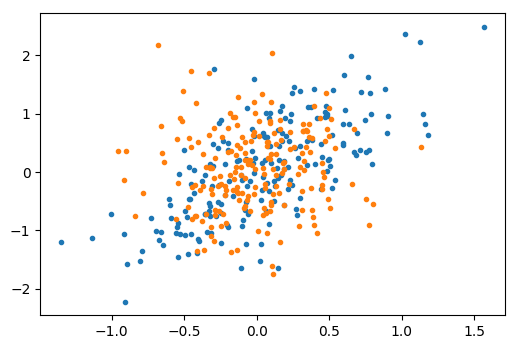

In [18]:
import utils
reload(utils)
reload(experiment_basic)
from experiment_basic import make_gaussian_data
from experiment_basic import make_pnl_data
# x, y, z = make_pnl_data(n_samples=1000, type='indep')
# plt.plot(z, y, '.', z, x, '.')

x, y = make_gaussian_data(n_samples=200, type='dep')
xi, yi = make_gaussian_data(n_samples=200, type='indep')
plt.plot(x, y, '.', xi, yi, '.')

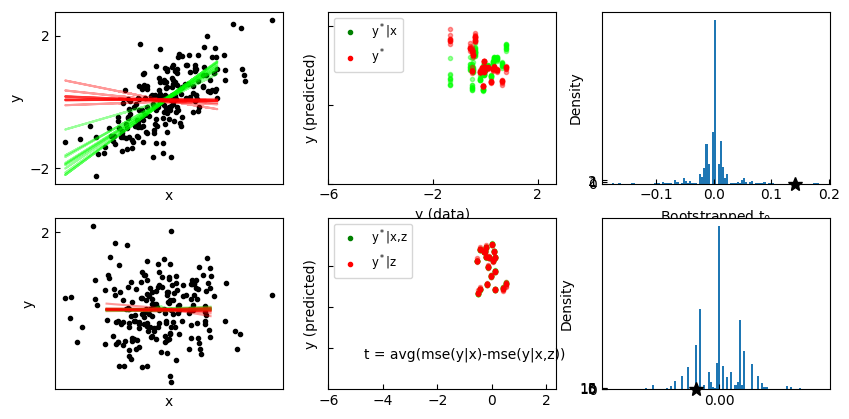

In [20]:
""" Fig. 1: Walk-through of the independence 
tester working on the mdn dataset."""
import independence_nn
reload(independence_nn)
N_SAMPLES = 200
MAX_TIME = 10
TEST_TYPE = 'min'
np.random.seed(1)
mpl.rc("savefig", dpi=100)


#=====================================================
# Make data such that x is independent of y given z.
#=====================================================
# x, y, z = make_anm_data(n_samples=N_SAMPLES)

# # Plots for x dep y.
# (pval_d, _, _, x_z_d, d1_preds_d, d0_preds_d,
#  d1_stats_d, d0_stats_d, t_obs_d, t_star_d, n_test_d) = independence_nn.indep_nn(
#     x, y, max_time=MAX_TIME, test_type=TEST_TYPE, plot_return=True)

# Plot x, y, and the prediction that uses z.
fig = plt.figure(figsize=(10, 5.), facecolor='white')
font = FontProperties()


# Plot x, y, and the prediction that uses z.
ax=plt.subplot(2, 3, 1)
ax.get_yaxis().set_tick_params(direction='in')
ax.get_xaxis().set_tick_params(direction='in')
plt.xlabel('x')
plt.ylabel('y')
plt.plot(x, y, 'k.')
plt.xticks([-6, -2, 2])
plt.yticks([-6, -2, 2])
ylim = ax.get_ylim()
sort_ids = np.argsort(y[:n_test_d].flatten())
for y_pred_id, y_pred in enumerate(d1_preds_d):
    plt.plot(x[sort_ids], y_pred[sort_ids], 'g-', color=(0, 1, 0, .4))
plt.plot(y[:n_test_d], y_pred * np.nan, 'g-', label='y$^*$|x')
for y_pred_id, y_pred in enumerate(d0_preds_d):
    plt.plot(x[sort_ids], y_pred[sort_ids], 'r-', color=(1, 0, 0, .4))
plt.plot(y[:n_test_d], y_pred * np.nan, 'r-', label='y$^*$')


ax=plt.subplot(2, 3, 2)
ax.get_yaxis().set_tick_params(direction='in')
ax.get_xaxis().set_tick_params(direction='in')
plt.xlabel('y (data)')
plt.ylabel('y (predicted)')
plt.ylim(ylim)
plt.xlim(ylim)
plt.yticks([-6, -2, 2], [])
plt.xticks([-6, -2, 2])
sort_ids = np.argsort(x[:n_test_d].flatten())
for y_pred_id, y_pred in enumerate(d1_preds_d):
    plt.plot(x[sort_ids], y_pred[sort_ids] - y[sort_ids], 'g.', color=(0, 1, 0, .4))
plt.plot(y[:n_test_d], y_pred * np.nan, 'g.', label='y$^*$|x')
for y_pred_id, y_pred in enumerate(d0_preds_d):
    plt.plot(x[sort_ids],  y_pred[sort_ids] - y[sort_ids], 'r.', color=(1, 0, 0, .4))
plt.plot(y[:n_test_d], y_pred * np.nan, 'r.', label='y$^*$')
plt.legend(loc=2, fontsize='small')


ax=plt.subplot(2, 3, 3)
ax.get_yaxis().set_tick_params(direction='in')
ax.get_xaxis().set_tick_params(direction='in')
plt.xlabel(r'Bootstrapped t$_0$')
plt.ylabel('Density')
plt.yticks([0, 1, 2])
plt.hist(t_star_d, bins=100, normed=True)
plt.plot(t_obs_d, [0], 'k*', ms=10, clip_on=False)
font.set_weight('heavy')
#plt.text(t_obs_d-.1, .2, '    t\np={}'.format(pval_d))#, fontproperties=font)


# Plots for x indep y given z
#x, y, z = make_anm_data(n_samples=N_SAMPLES)

# (pval_i, _, _, x_z_i, d1_preds_i, d0_preds_i,
#  d1_stats_i, d0_stats_i, t_obs_i, t_star_i, n_test_i) = independence_nn.indep_nn(
#     xi, yi, max_time=MAX_TIME, test_type=TEST_TYPE, plot_return=True)

ax=plt.subplot(2, 3, 4)
ax.get_yaxis().set_tick_params(direction='in')
ax.get_xaxis().set_tick_params(direction='in')
plt.xlabel('x')
plt.ylabel('y')
plt.plot(xi, yi, 'k.')
plt.xticks([-6, -2, 2])
plt.yticks([-6, -2, 2])
ylim = ax.get_ylim()
sort_ids = np.argsort(xi[:n_test_i].flatten())
for y_pred_id, y_pred in enumerate(d1_preds_i):
    plt.plot(xi[sort_ids], y_pred[sort_ids], 'g-', color=(0, 1, 0, .4))
plt.plot(yi[:n_test_i], y_pred * np.nan, 'g-', label='y$^*$|x')
for y_pred_id, y_pred in enumerate(d0_preds_i):
    plt.plot(xi[sort_ids], y_pred[sort_ids], 'r-', color=(1, 0, 0, .4))
plt.plot(yi[:n_test_i], y_pred * np.nan, 'r-', label='y$^*$')


ax=plt.subplot(2, 3, 5)
ax.get_yaxis().set_tick_params(direction='in')
ax.get_xaxis().set_tick_params(direction='in')
for y_pred_id, y_pred in enumerate(d1_preds_i):
    plt.plot(xi[sort_ids], y_pred[sort_ids] - yi[sort_ids], 'g.', color=(0, 1, 0, .4))
plt.plot(y[:n_test_i], y_pred * np.nan, 'g.', label='y$^*$|x,z')
for y_pred_id, y_pred in enumerate(d0_preds_i):
    plt.plot(xi[sort_ids], y_pred[sort_ids] - yi[sort_ids], 'r.', color=(1, 0, 0, .4))
plt.plot(yi[:n_test_i], y_pred * np.nan, 'r.', label='y$^*$|z')
plt.legend(loc=2, fontsize='small')
plt.ylim(ylim)
plt.xlim(ylim)
plt.yticks([-4, -2, 0], [])
plt.ylabel('y (predicted)')
plt.text(-4.7, -4.5, r't = avg(mse(y|x)-mse(y|x,z))')



ax=plt.subplot(2, 3, 6)
ax.get_yaxis().set_tick_params(direction='in')
ax.get_xaxis().set_tick_params(direction='in')
plt.hist(t_star_i, bins=100, normed=True)
plt.ylabel('Density')
plt.xticks([-.05, 0, .05])
plt.yticks([0, 5, 10, 15])
plt.plot(t_obs_i, [0], 'k*', ms=10, clip_on=False)
font.set_weight('heavy')
#plt.text(t_obs_i-.02, 1, '    t\np={:.2g}'.format(pval_i))#, fontproperties=font)




plt.show()

In [1]:
""" Plot power and size curves. """
import experiment_basic
reload(experiment_basic)
from experiment_basic import make_chaos_data
from independence_nn import indep_nn
n_trials = 30
max_time = 10
pval_d = []
pval_i = []

for trial_id in range(n_trials):
    # Compute the size of the test at alpha=.05 and alpha=.001
    x, y, z = make_chaos_data(type='dep', n_samples=300)
    pval_d.append(indep_nn(x, y, z, max_time=max_time, verbose=False))
    x, y, z = make_chaos_data(type='indep', n_samples=300)
    pval_i.append(indep_nn(x, y, z, max_time=max_time, verbose=False))
    print('Trial {}. p_d {:.4g}, p_i {:.4g}.'.format(
            trial_id, pval_d[-1], pval_i[-1]))


Trial 0. p_d 0, p_i 0.2499.
Trial 1. p_d 0.0001, p_i 0.8744.
Trial 2. p_d 0, p_i 0.9011.
Trial 3. p_d 0, p_i 0.0782.
Trial 4. p_d 0.0007, p_i 0.1453.
Trial 5. p_d 0, p_i 0.9691.
Trial 6. p_d 0, p_i 0.0459.
Trial 7. p_d 0, p_i 0.075.
Trial 8. p_d 0, p_i 0.4869.
Trial 9. p_d 0, p_i 0.6606.
Trial 10. p_d 0.0001, p_i 0.9999.
Trial 11. p_d 0, p_i 0.031.
Trial 12. p_d 0.0002, p_i 0.0037.
Trial 13. p_d 0, p_i 0.2073.
Trial 14. p_d 0, p_i 0.2464.
Trial 15. p_d 0, p_i 0.9595.
Trial 16. p_d 0, p_i 0.1748.
Trial 17. p_d 0, p_i 0.7884.
Trial 18. p_d 0, p_i 0.0005.
Trial 19. p_d 0, p_i 0.2906.
Trial 20. p_d 0, p_i 0.9975.
Trial 21. p_d 0, p_i 0.0227.
Trial 22. p_d 0, p_i 0.7762.
Trial 23. p_d 0, p_i 0.0189.
Trial 24. p_d 0, p_i 0.2696.
Trial 25. p_d 0, p_i 0.8854.
Trial 26. p_d 0.0003, p_i 0.1746.
Trial 27. p_d 0, p_i 0.1681.
Trial 28. p_d 0, p_i 0.3346.
Trial 29. p_d 0, p_i 0.9998.


ERROR:tornado.application:Exception in callback <functools.partial object at 0x7fafac0e5628>
Traceback (most recent call last):
  File "/home/kchalupk/projects/neon12/.venv/local/lib/python2.7/site-packages/tornado/ioloop.py", line 600, in _run_callback
    ret = callback()
  File "/home/kchalupk/projects/neon12/.venv/local/lib/python2.7/site-packages/tornado/stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/kchalupk/projects/neon12/.venv/local/lib/python2.7/site-packages/ipykernel/kernelbase.py", line 242, in enter_eventloop
    self.eventloop(self)
  File "/home/kchalupk/projects/neon12/.venv/local/lib/python2.7/site-packages/ipykernel/eventloops.py", line 163, in loop_tk
    kernel.timer = Timer(doi)
  File "/home/kchalupk/projects/neon12/.venv/local/lib/python2.7/site-packages/ipykernel/eventloops.py", line 151, in __init__
    self.app = Tk()
  File "/usr/lib/python2.7/lib-tk/Tkinter.py", line 1767, in __init__
    self.tk = _tkinter.create(